# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 120kB/s 
     |████████████████████████████████| 450kB 49.8MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 3.8MB 43.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=e5cab5a54d018b9a4e7b7493e3daa64437bd4b704052ad711902bd4aa31b7a7b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder (1 mark)

In [ ]:
import os
#### Add your code here ####
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
%cd /content

/content


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/


/content/drive


In [ ]:
%ls

'My Drive'/


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
%cd Colab\ Notebooks

[Errno 2] No such file or directory: 'Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


In [ ]:
import sys
directory = !pwd
print(sys.path)
print(directory)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']
['/content/drive/My Drive/Colab Notebooks']


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
print(np.__version__)

1.16.1


In [ ]:
!pip install numpy==1.16.1
#import numpy as np

In [ ]:
import numpy as np
#### Add your code here ####
data = np.load(directory[0] + '/images.npy')

In [ ]:
print(np.__version__)

1.16.1


### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [ ]:
#### Add your code here ####
print(data.size)
print(data.shape)
print(data[0][1])

818
(409, 2)
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_WIDTH = 224 
#### Add your code here ####
IMAGE_HEIGHT = 224 
#### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (2 marks)

In [ ]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [ ]:
#### Add your code here ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

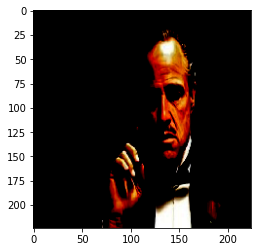

In [ ]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

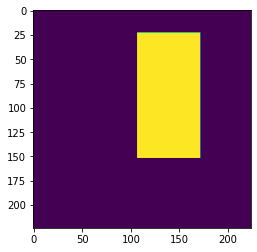

In [ ]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
NUMBER_OF_CHANNEL = 3

In [ ]:
#@title
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, Conv2DTranspose, UpSampling2D,Dense,Flatten, Conv2D, Reshape, InputLayer, Dropout, Lambda, Input, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

def create_model(trainable=True):

    model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH, 3), alpha=1.0, include_top=False, weights='imagenet')
    for layer in model.layers:
        layer.trainable = trainable


    
    
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)




In [ ]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
#model.summary()
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

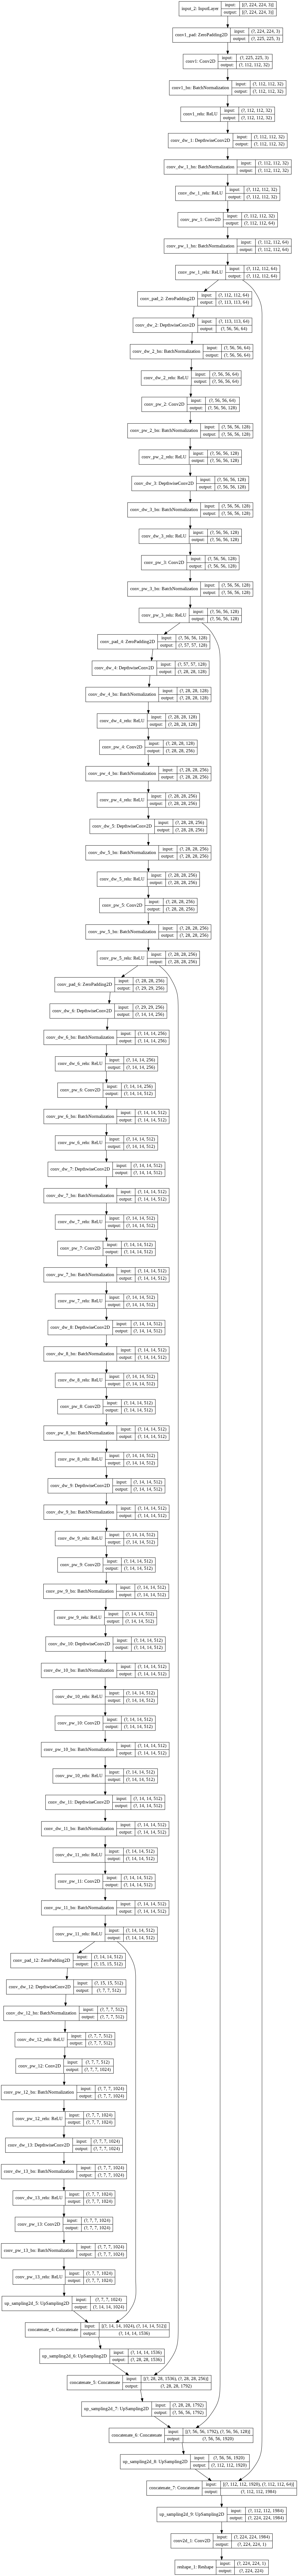

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### Call the create_model function

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [ ]:
import tensorflow as tf

from tensorflow.math import reduce_sum
from tensorflow.keras.backend import epsilon
def dice_coefficient(y_true, y_pred):
    #### Add your code here #####
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)

    return numerator / (denominator + epsilon())
    

### Define loss

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:


model.compile(optimizer='adam', loss=loss, metrics=dice_coefficient)


#model.fit(X_train,y_train,batch_size=32,epochs=30,validation_data=(X_test, y_test)) 

### Define checkpoint and earlystopping

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [ ]:
EPOCHS = 5
#VAL_SUBSPLITS = 5

#VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model.fit(X_train, masks,batch_size=1,callbacks=[stop,checkpoint,reduce_lr],epochs=5)     # which functions ?????

Epoch 1/5
408/409 [============================>.] - ETA: 0s - loss: 1.2625 - dice_coefficient: 0.5012
Epoch 00001: loss improved from inf to 1.26264, saving model to model-1.26.h5
409/409 [==============================] - 20s 48ms/step - loss: 1.2626 - dice_coefficient: 0.5007
Epoch 2/5
409/409 [==============================] - ETA: 0s - loss: 0.8512 - dice_coefficient: 0.6030
Epoch 00002: loss improved from 1.26264 to 0.85124, saving model to model-0.85.h5
409/409 [==============================] - 21s 51ms/step - loss: 0.8512 - dice_coefficient: 0.6030
Epoch 3/5
409/409 [==============================] - ETA: 0s - loss: 0.6795 - dice_coefficient: 0.6589
Epoch 00003: loss improved from 0.85124 to 0.67950, saving model to model-0.68.h5
409/409 [==============================] - 20s 48ms/step - loss: 0.6795 - dice_coefficient: 0.6589
Epoch 4/5
409/409 [==============================] - ETA: 0s - loss: 0.6731 - dice_coefficient: 0.6667
Epoch 00004: loss improved from 0.67950 to 0.6731

### Get the predicted mask for a sample image   (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

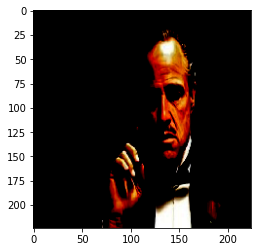

In [ ]:

n = 10
sample_image = X_train[n] 
print(sample_image)
pyplot.imshow(sample_image)
print(sample_image.shape) 
pyplot.savefig('sample_image.jpg')
#newaxis = []
#sample_Predict_out = model.predict(sample_image[newaxis])    

[[[1.3213520e-06 1.3213520e-06 1.6364294e-06 ... 6.1909181e-05
   7.6466349e-05 7.6466349e-05]
  [1.3213520e-06 1.3213520e-06 1.6364294e-06 ... 6.1909181e-05
   7.6466349e-05 7.6466349e-05]
  [1.3318449e-06 1.3318449e-06 2.7869266e-06 ... 1.0166143e-04
   4.7854614e-05 4.7854614e-05]
  ...
  [4.7898469e-10 4.7898469e-10 1.0173717e-09 ... 4.7903357e-12
   2.2341979e-12 2.2341979e-12]
  [3.9231254e-10 3.9231254e-10 4.9488069e-10 ... 2.4312846e-12
   2.9285359e-12 2.9285359e-12]
  [3.9231254e-10 3.9231254e-10 4.9488069e-10 ... 2.4312846e-12
   2.9285359e-12 2.9285359e-12]]]


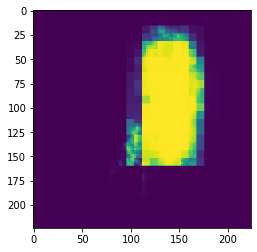

In [ ]:
from tensorflow import newaxis
pred_mask = model.predict(sample_image[newaxis])
print(pred_mask)
pred_mask = pred_mask.reshape(224,224)
pyplot.imshow(pred_mask)
pyplot.savefig('pred_mask.jpg')


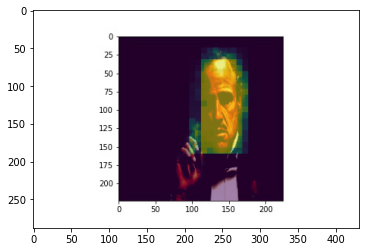

In [ ]:
from PIL import Image

background = Image.open(directory[0]+'/sample_image.jpg','r')
#background = Image.open(r'sample_image.jpg').convert('L')
overlay = Image.open(directory[0]+'/pred_mask.jpg','r')
background.show()
new_img = Image.blend(background, overlay, 0.5)
new_img.show('Imposed the mask on Original')
new_img.save(directory[0]+'/imposed_mask_on_original.jpg')

pyplot.imshow(new_img)
